# Challenge-Titanic prediction improved

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
plt.style.use("seaborn")


# read data

In [93]:
data=pd.read_csv("./Dataset/Train/Train.csv")

In [94]:
data.head(n=20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.7500,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.0000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.0000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.5250,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.2500,NaN,Q,16,NaN,NaN
5,2.0,0.0,"Gaskell, Mr. Alfred",male,16.0,0.0,0.0,239865,26.0000,NaN,S,NaN,NaN,"Liverpool / Montreal, PQ"
6,2.0,0.0,"Phillips, Mr. Escott Robert",male,43.0,0.0,1.0,S.O./P.P. 2,21.0000,NaN,S,NaN,NaN,"Ilfracombe, Devon"
7,1.0,1.0,"Leader, Dr. Alice (Farnham)",female,49.0,0.0,0.0,17465,25.9292,D17,S,8,NaN,"New York, NY"
8,1.0,0.0,"Brandeis, Mr. Emil",male,48.0,0.0,0.0,PC 17591,50.4958,B10,C,NaN,208.0,"Omaha, NE"
9,2.0,0.0,"Wheeler, Mr. Edwin ""Frederick""",male,NaN,0.0,0.0,SC/PARIS 2159,12.8750,NaN,S,NaN,NaN,NaN


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
pclass       1009 non-null float64
survived     1009 non-null float64
name         1009 non-null object
sex          1009 non-null object
age          812 non-null float64
sibsp        1009 non-null float64
parch        1009 non-null float64
ticket       1009 non-null object
fare         1008 non-null float64
cabin        229 non-null object
embarked     1008 non-null object
boat         374 non-null object
body         98 non-null float64
home.dest    582 non-null object
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


In [96]:
data=data.drop(columns=["name","ticket","cabin","boat","body","home.dest"],axis=0)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
pclass      1009 non-null float64
survived    1009 non-null float64
sex         1009 non-null object
age         812 non-null float64
sibsp       1009 non-null float64
parch       1009 non-null float64
fare        1008 non-null float64
embarked    1008 non-null object
dtypes: float64(6), object(2)
memory usage: 63.2+ KB


# visualisation

In [98]:
# age and sex
survived = 'survived'
not_survived = 'not survived'
women = data[data['sex']=='female']
men = data[data['sex']=='male']
women_survived=women[women["survived"]==1].age.dropna()
women_notsurvived=women[women["survived"]==0].age.dropna()
men_survived=men[men["survived"]==1].age.dropna()
men_notsurvived=men[men["survived"]==0].age.dropna()



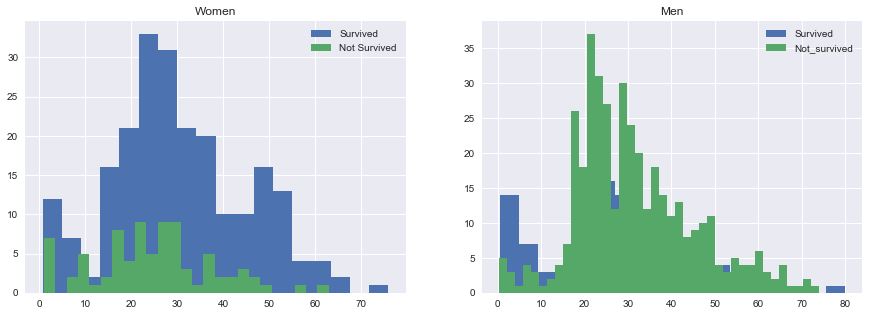

In [99]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].title.set_text("Women")
axes[0].hist(women_survived,bins=18,label="Survived")
axes[0].hist(women_notsurvived,bins=25,label="Not Survived")
axes[0].legend()
axes[1].title.set_text("Men")
axes[1].hist(men_survived,bins=18,label="Survived")
axes[1].hist(men_notsurvived,bins=40,label="Not_survived")
axes[1].legend()
plt.show()

In [100]:
import seaborn as sns

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


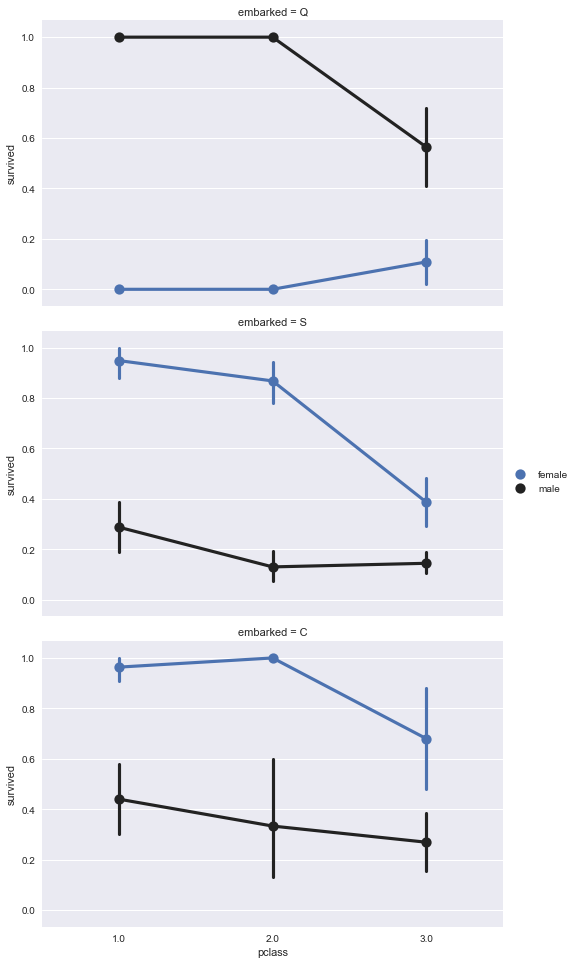

In [101]:
# embarked

FacetGrid = sns.FacetGrid(data, row='embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

# pclass

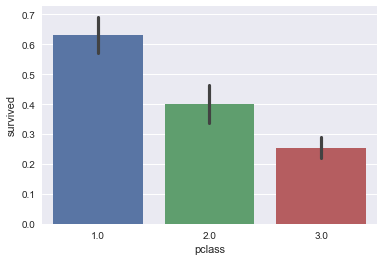

In [102]:
sns.barplot(x='pclass',y='survived',data=data)

In [103]:
# sibling and parch

In [104]:
data['relatives'] = data['sibsp'] + data['parch']
data.loc[data['relatives'] > 0, 'not_alone'] = 0
data.loc[data['relatives'] == 0, 'not_alone'] = 1
data['not_alone'] = data['not_alone'].astype(int)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


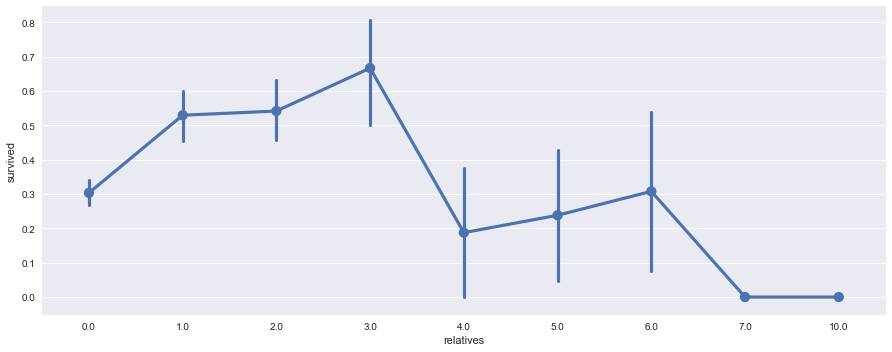

In [105]:
axes = sns.factorplot('relatives','survived', 
                      data=data, aspect = 2.5, )

# Data preprocession 

In [106]:
data.not_alone.head()

0    1
1    1
2    1
3    0
4    0
Name: not_alone, dtype: int32

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
pclass       1009 non-null float64
survived     1009 non-null float64
sex          1009 non-null object
age          812 non-null float64
sibsp        1009 non-null float64
parch        1009 non-null float64
fare         1008 non-null float64
embarked     1008 non-null object
relatives    1009 non-null float64
not_alone    1009 non-null int32
dtypes: float64(7), int32(1), object(2)
memory usage: 75.0+ KB


In [108]:
data["age"]=data["age"].fillna(data["age"].mean())
data["fare"]=data["fare"].fillna(data["fare"].mean())
data["embarked"]=data["embarked"].fillna('S')

In [109]:
data.head(n=20)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone
0,3.0,0.0,female,29.838978,0.0,0.0,7.7500,Q,0.0,1
1,2.0,0.0,male,39.000000,0.0,0.0,26.0000,S,0.0,1
2,2.0,1.0,female,40.000000,0.0,0.0,13.0000,S,0.0,1
3,3.0,1.0,female,31.000000,1.0,1.0,20.5250,S,2.0,0
4,3.0,1.0,female,29.838978,2.0,0.0,23.2500,Q,2.0,0
5,2.0,0.0,male,16.000000,0.0,0.0,26.0000,S,0.0,1
6,2.0,0.0,male,43.000000,0.0,1.0,21.0000,S,1.0,0
7,1.0,1.0,female,49.000000,0.0,0.0,25.9292,S,0.0,1
8,1.0,0.0,male,48.000000,0.0,0.0,50.4958,C,0.0,1
9,2.0,0.0,male,29.838978,0.0,0.0,12.8750,S,0.0,1


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
pclass       1009 non-null float64
survived     1009 non-null float64
sex          1009 non-null object
age          1009 non-null float64
sibsp        1009 non-null float64
parch        1009 non-null float64
fare         1009 non-null float64
embarked     1009 non-null object
relatives    1009 non-null float64
not_alone    1009 non-null int32
dtypes: float64(7), int32(1), object(2)
memory usage: 75.0+ KB


In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
le1=LabelEncoder()
le2=LabelEncoder()

In [113]:
data["sex"]=le1.fit_transform(data["sex"])
data["embarked"]=le1.fit_transform(data["embarked"])

In [114]:
data["pclass"]=data["pclass"].astype(int)
data["sibsp"]=data["sibsp"].astype(int)
data["relatives"]=data["relatives"].astype(int)
data["parch"]=data["parch"].astype(int)
data["age"]=data["age"].astype(int)
data["fare"]=data["fare"].astype(int)

In [115]:
data.head(n=20)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone
0,3,0.0,0,29,0,0,7,1,0,1
1,2,0.0,1,39,0,0,26,2,0,1
2,2,1.0,0,40,0,0,13,2,0,1
3,3,1.0,0,31,1,1,20,2,2,0
4,3,1.0,0,29,2,0,23,1,2,0
5,2,0.0,1,16,0,0,26,2,0,1
6,2,0.0,1,43,0,1,21,2,1,0
7,1,1.0,0,49,0,0,25,2,0,1
8,1,0.0,1,48,0,0,50,0,0,1
9,2,0.0,1,29,0,0,12,2,0,1


In [116]:
data.loc[ data['age'] <= 11, 'age'] = 0
data.loc[(data['age'] > 11) & (data['age'] <= 18), 'age'] = 1
data.loc[(data['age'] > 18) & (data['age'] <= 22), 'age'] = 2
data.loc[(data['age'] > 22) & (data['age'] <= 27), 'age'] = 3
data.loc[(data['age'] > 27) & (data['age'] <= 33), 'age'] = 4
data.loc[(data['age'] > 33) & (data['age'] <= 40), 'age'] = 5
data.loc[(data['age'] > 40) & (data['age'] <= 66), 'age'] = 6
data.loc[ data['age'] > 66, 'age'] = 6

In [117]:
np.unique(data["age"])

array([0, 1, 2, 3, 4, 5, 6])

In [118]:
data["age"].value_counts()

4    340
6    174
3    137
5    103
2    100
1     81
0     74
Name: age, dtype: int64

In [126]:
dt=DecisionTreeClassifier(criterion='entropy')

In [127]:
ytrain=data["survived"]
xtrain=data.drop(columns=["survived"],axis=1)

In [128]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [129]:
dt.score(xtrain,ytrain)

0.9167492566897919

In [133]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=100)

In [134]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
rf.score(xtrain,ytrain)

0.9167492566897919